##### 1 PANDAS

### 1.1 How to read Excel file

In [61]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [62]:
mydata = 'data/chirps_pr_daily_1981-2010.xlsx'
df = pd.read_excel(mydata)

In [63]:
df.head()

DATA  POSTO1  POSTO2  POSTO3  POSTO4  POSTO5  POSTO6
0 1981-01-01    9.78   11.60    9.36    5.87    9.55   13.25
1 1981-01-02    1.50    1.05    3.09    8.49    2.59    0.31
2 1981-01-03    0.00    0.00    0.00    0.00    0.00    0.00
3 1981-01-04    0.00    0.06    0.00    0.00    0.00    0.00
4 1981-01-05    0.00    0.00    0.00    0.00    0.00    0.00

In [64]:
# Definir coluna DATA como novo índice do Data Frame
df.set_index(df['DATA'], inplace=True)

In [65]:
df.head()

DATA  POSTO1  POSTO2  POSTO3  POSTO4  POSTO5  POSTO6
DATA                                                                 
1981-01-01 1981-01-01    9.78   11.60    9.36    5.87    9.55   13.25
1981-01-02 1981-01-02    1.50    1.05    3.09    8.49    2.59    0.31
1981-01-03 1981-01-03    0.00    0.00    0.00    0.00    0.00    0.00
1981-01-04 1981-01-04    0.00    0.06    0.00    0.00    0.00    0.00
1981-01-05 1981-01-05    0.00    0.00    0.00    0.00    0.00    0.00

In [66]:
# Remover coluna DATA que não será usada
df = df.drop(['DATA'], axis=1)

In [67]:
df.head()

POSTO1  POSTO2  POSTO3  POSTO4  POSTO5  POSTO6
DATA                                                      
1981-01-01    9.78   11.60    9.36    5.87    9.55   13.25
1981-01-02    1.50    1.05    3.09    8.49    2.59    0.31
1981-01-03    0.00    0.00    0.00    0.00    0.00    0.00
1981-01-04    0.00    0.06    0.00    0.00    0.00    0.00
1981-01-05    0.00    0.00    0.00    0.00    0.00    0.00

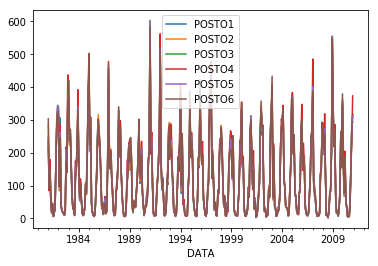

In [68]:
# Calcular acumulado mensal para todos os postos
pr_acum_mes = df.resample('M').sum().plot()

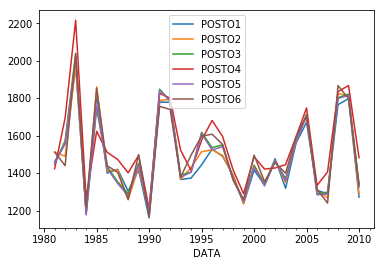

In [69]:
# Calcular acumulado anual para todos os postos
pr_acum_ano = df.resample('A').sum().plot()

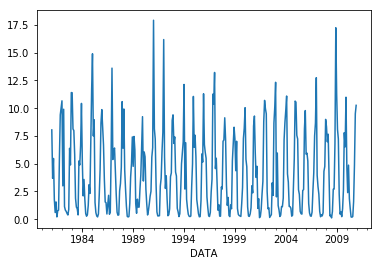

In [70]:
# Calcular média mensal para somente para o POSTO1
pr_media_mes = df['POSTO1'].resample('M').mean().plot()

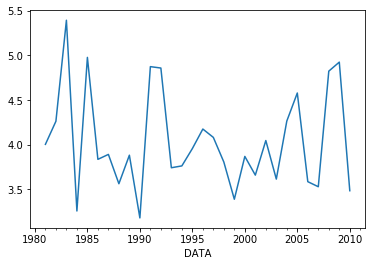

In [71]:
# Calcular média anual para somente para o POSTO1
pr_media_ano = df['POSTO1'].resample('A').mean().plot()

### 1.2 Ler Arquivo Texto e Transformar Colunas em Índices de Datas

In [72]:
import pandas as pd
import datetime

%matplotlib inline

In [73]:
# Ler arquivo de texto
mydata = 'data/funceme_ce_pr_accum_monthly_1974-2016.asc'
df = pd.read_table(mydata, sep=' ', header=None, names=['ANO', 'MES', 'PR'])

In [74]:
df.head()

ANO  MES      PR
0  1974    1  227.83
1  1974    2  182.76
2  1974    3  320.37
3  1974    4  404.96
4  1974    5  212.00

In [75]:
df.tail()

ANO  MES     PR
511  2016    8   0.04
512  2016    9   0.69
513  2016   10   0.17
514  2016   11   0.49
515  2016   12  27.26

In [76]:
df['DIA'] = 1

In [77]:
df.head()

ANO  MES      PR  DIA
0  1974    1  227.83    1
1  1974    2  182.76    1
2  1974    3  320.37    1
3  1974    4  404.96    1
4  1974    5  212.00    1

In [78]:
df.dtypes

ANO      int64
MES      int64
PR     float64
DIA      int64
dtype: object

In [79]:
# Tranformar colunas em datas e adicionar uma nova coluna do tipo 'datetime'
df['DATA'] = df[['ANO', 'MES', 'DIA']].apply(lambda x: datetime.datetime(*x), axis=1)

In [80]:
df.dtypes

ANO              int64
MES              int64
PR             float64
DIA              int64
DATA    datetime64[ns]
dtype: object

In [81]:
df.head()

ANO  MES      PR  DIA       DATA
0  1974    1  227.83    1 1974-01-01
1  1974    2  182.76    1 1974-02-01
2  1974    3  320.37    1 1974-03-01
3  1974    4  404.96    1 1974-04-01
4  1974    5  212.00    1 1974-05-01

In [82]:
df.set_index(df['DATA'], inplace=True)

In [83]:
df.head()

ANO  MES      PR  DIA       DATA
DATA                                         
1974-01-01  1974    1  227.83    1 1974-01-01
1974-02-01  1974    2  182.76    1 1974-02-01
1974-03-01  1974    3  320.37    1 1974-03-01
1974-04-01  1974    4  404.96    1 1974-04-01
1974-05-01  1974    5  212.00    1 1974-05-01

In [84]:
df = df.drop(['ANO', 'MES', 'DIA', 'DATA'], axis=1)

In [85]:
df.head()

PR
DATA              
1974-01-01  227.83
1974-02-01  182.76
1974-03-01  320.37
1974-04-01  404.96
1974-05-01  212.00

### 1.3 Ler Arquivo Texto e Criar e Novo Índice de Datas

In [86]:
import pandas as pd

In [87]:
mydata = 'data/funceme_ce_pr_accum_monthly_1974-2016_one_col.asc'
df = pd.read_table(mydata, sep=' ', header=None, names=['PR'])

In [88]:
df.head()

PR
0  227.83
1  182.76
2  320.37
3  404.96
4  212.00

In [89]:
dates = pd.date_range('1974/01/01', '2016/12/01', freq='MS')

In [90]:
dates

DatetimeIndex(['1974-01-01', '1974-02-01', '1974-03-01', '1974-04-01',
               '1974-05-01', '1974-06-01', '1974-07-01', '1974-08-01',
               '1974-09-01', '1974-10-01',
               ...
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', length=516, freq='MS')

In [91]:
# Adicionar ao Data Frame nova coluna com as datas
df['DATA'] = dates

In [92]:
# Definir coluna DATA com novo índice do Data Frame e remover colunas que não serão usadas
df.set_index(df['DATA'], inplace=True)
df = df.drop(['DATA'], axis=1)

In [93]:
df.head()

PR
DATA              
1974-01-01  227.83
1974-02-01  182.76
1974-03-01  320.37
1974-04-01  404.96
1974-05-01  212.00

### 1.1. How to read cvs file from url

In [94]:
import io
import requests
import pandas as pd

In [95]:
# url monthly precipitation
url = 'https://gitlab.com/marcelorodriguesss/repodata/raw/' \
      'master/data/pr_monthly_funceme_thiessen_19740101_20171231_ce.csv'

In [96]:
# load page
webpage = requests.get(url).content

In [97]:
# DataFrame
df = pd.read_csv(io.StringIO(webpage.decode('utf-8')),
                 sep=';', header=None, names=['DATE', 'PR'],
                 index_col=0, parse_dates=True)

In [98]:
df.index

DatetimeIndex(['1974-01-31', '1974-02-28', '1974-03-31', '1974-04-30',
               '1974-05-31', '1974-06-30', '1974-07-31', '1974-08-31',
               '1974-09-30', '1974-10-31',
               ...
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', name='DATE', length=540, freq=None)

In [99]:
df.head()

PR
DATE              
1974-01-31  227.83
1974-02-28  182.76
1974-03-31  320.37
1974-04-30  404.96
1974-05-31  212.00

In [100]:
df.dtypes

PR    float64
dtype: object

### 1.2. How to read txt file from url

In [101]:
import io
import requests
import datetime
import pandas as pd

In [102]:
# url daily precip
url = 'https://gitlab.com/marcelorodriguesss/repodata/raw/' \
      'master/data/pr_daily_funceme_inmet_sudene_thiessen_19710101_20171231_ce.txt'

In [103]:
# load page
webpage = requests.get(url).content

In [104]:
# DataFrame
df = pd.read_table(io.StringIO(webpage.decode('utf-8')), sep=' ', 
                   header=None, names=['ANO', 'MES', 'DIA', 'PR'])

In [105]:
# new column as Datetime
df['DATA'] = df[['ANO', 'MES', 'DIA']].apply(lambda x: datetime.datetime(*x), axis=1)

In [106]:
# set column 'DATA' as index
df.set_index(df['DATA'], inplace=True)

In [107]:
# remove unused columns
df = df.drop(['ANO', 'MES', 'DIA', 'DATA'], axis=1)

In [108]:
df.index

DatetimeIndex(['1971-01-01', '1971-01-02', '1971-01-03', '1971-01-04',
               '1971-01-05', '1971-01-06', '1971-01-07', '1971-01-08',
               '1971-01-09', '1971-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='DATA', length=17167, freq=None)

In [109]:
df.head()

PR
DATA            
1971-01-01  0.01
1971-01-02  0.13
1971-01-03  0.20
1971-01-04  0.07
1971-01-05  0.02

In [110]:
df.dtypes

PR    float64
dtype: object

### 1.3. How to get the last n days in time series

In [111]:
import io
import requests
import datetime
import pandas as pd

# url daily precip
url = 'https://gitlab.com/marcelorodriguesss/repodata/raw/' \
      'master/data/pr_daily_funceme_inmet_sudene_thiessen_19710101_20171231_ce.txt'

# load page
webpage = requests.get(url).content

# DataFrame
df = pd.read_table(io.StringIO(webpage.decode('utf-8')), sep=' ', 
                   header=None, names=['ANO', 'MES', 'DIA', 'PR'])

# new column as Datetime
df['DATA'] = df[['ANO', 'MES', 'DIA']].apply(lambda x: datetime.datetime(*x), axis=1)

# set column 'DATA' as index
df.set_index(df['DATA'], inplace=True)

# remove unused columns
df = df.drop(['ANO', 'MES', 'DIA', 'DATA'], axis=1)

In [112]:
# get last 12days
df.last('5D')

PR
DATA            
2017-12-27  0.90
2017-12-28  0.34
2017-12-29  0.04
2017-12-30  0.00
2017-12-31  0.01

In [113]:
# get last 3 months
df.last('2M')

PR
DATA              
2017-11-01    0.00
2017-11-02    0.00
2017-11-03    0.17
2017-11-04    0.00
2017-11-05    0.00
2017-11-06    0.00
2017-11-07    0.00
2017-11-08    2.03
2017-11-09    1.42
2017-11-10    2.05
2017-11-11 -999.00
2017-11-12    0.00
2017-11-13    0.00
2017-11-14    0.00
2017-11-15    0.00
2017-11-16    0.00
2017-11-17    0.07
2017-11-18    0.01
2017-11-19    0.00
2017-11-20    0.00
2017-11-21    0.00
2017-11-22    0.01
2017-11-23    0.10
2017-11-24    0.28
2017-11-25    1.26
2017-11-26    0.06
2017-11-27    0.07
2017-11-28    0.39
2017-11-29    0.01
2017-11-30    0.00
...            ...
2017-12-02    0.01
2017-12-03    0.01
2017-12-04    0.00
2017-12-05    0.00
2017-12-06    0.00
2017-12-07    0.00
2017-12-08    0.01
2017-12-09    0.00
2017-12-10    0.00
2017-12-11    0.00
2017-12-12    0.06
2017-12-13    0.07
2017-12-14    0.04
2017-12-15    0.24
2017-12-16    0.80
2017-12-17    0.19
2017-12-18    0.17
2017-12-19    0.15
2017-12-20    0.54
2017-12-21    1.99
2017-12-22    2.71
2017-12-23    3.48
2017-12-24    8.29
2017-12-25    1.41
2017-12-26    1.22
2017-12-27    0.90
2017-12-28    0.34
2017-12-29    0.04
2017-12-30    0.00
2017-12-31    0.01

[61 rows x 1 columns]

In [114]:
# get last 2 years
df.last('2A')

PR
DATA             
2016-01-01   0.43
2016-01-02   0.18
2016-01-03   0.33
2016-01-04   0.94
2016-01-05   0.28
2016-01-06   1.40
2016-01-07  13.81
2016-01-08   8.89
2016-01-09  11.54
2016-01-10   4.64
2016-01-11   2.03
2016-01-12   0.46
2016-01-13   0.45
2016-01-14   8.46
2016-01-15   3.82
2016-01-16   0.89
2016-01-17   2.04
2016-01-18   5.22
2016-01-19  17.39
2016-01-20   5.87
2016-01-21  26.82
2016-01-22  27.91
2016-01-23  10.34
2016-01-24  12.15
2016-01-25  15.13
2016-01-26   4.71
2016-01-27   1.37
2016-01-28   2.12
2016-01-29   0.50
2016-01-30   0.39
...           ...
2017-12-02   0.01
2017-12-03   0.01
2017-12-04   0.00
2017-12-05   0.00
2017-12-06   0.00
2017-12-07   0.00
2017-12-08   0.01
2017-12-09   0.00
2017-12-10   0.00
2017-12-11   0.00
2017-12-12   0.06
2017-12-13   0.07
2017-12-14   0.04
2017-12-15   0.24
2017-12-16   0.80
2017-12-17   0.19
2017-12-18   0.17
2017-12-19   0.15
2017-12-20   0.54
2017-12-21   1.99
2017-12-22   2.71
2017-12-23   3.48
2017-12-24   8.29
2017-12-25   1.41
2017-12-26   1.22
2017-12-27   0.90
2017-12-28   0.34
2017-12-29   0.04
2017-12-30   0.00
2017-12-31   0.01

[731 rows x 1 columns]

In [115]:
# get last n days from specific date
n = 5
lastdayfrom = pd.to_datetime('12/12/2016')
df.loc[lastdayfrom - pd.Timedelta(days=n):lastdayfrom].reset_index()

DATA    PR
0 2016-12-07  0.00
1 2016-12-08  0.00
2 2016-12-09  0.00
3 2016-12-10  0.02
4 2016-12-11  0.01
5 2016-12-12  0.04

### 1.5. Apply a Function to Every Row in a Column

In [116]:
import io
import requests
import datetime
import pandas as pd

# url daily precip
url = 'https://gitlab.com/marcelorodriguesss/repodata/raw/' \
      'master/data/pr_daily_funceme_inmet_sudene_thiessen_19710101_20171231_ce.txt'

# load page
webpage = requests.get(url).content

# DataFrame
df = pd.read_table(io.StringIO(webpage.decode('utf-8')), sep=' ', 
                   header=None, names=['ANO', 'MES', 'DIA', 'PR'])

# new column as Datetime
df['DATA'] = df[['ANO', 'MES', 'DIA']].apply(lambda x: datetime.datetime(*x), axis=1)

# set column 'DATA' as index
df.set_index(df['DATA'], inplace=True)

# remove unused columns
df = df.drop(['ANO', 'MES', 'DIA', 'DATA'], axis=1)

In [117]:
df.head()

PR
DATA            
1971-01-01  0.01
1971-01-02  0.13
1971-01-03  0.20
1971-01-04  0.07
1971-01-05  0.02

In [118]:
# function
def calc_something(precip):
    result = precip * 100
    return result

In [119]:
# Apply a Function to Every Row in a Column
df['RESULT'] = df.PR.apply(calc_something)

In [120]:
df.head()

PR  RESULT
DATA                    
1971-01-01  0.01     1.0
1971-01-02  0.13    13.0
1971-01-03  0.20    20.0
1971-01-04  0.07     7.0
1971-01-05  0.02     2.0